In [ ]:
#Initialize

In [4]:
#cd '/Users/nico/qkit'
import qkit
from qkit.storage import hdf_lib as hl
import h5py as h5
from pylab import *
import numpy as np
#matplotlib osx

#%matplotlib inline

Config at C:\Users\Dominik Dorer\Desktop\qkit\qkit\core\qckit.cfg


In [ ]:
## change directory here, so we can keep the file name everytime the same

In [30]:
cd C:\Users\Dominik Dorer\Desktop\MA_Analysis_Nb\Transport_measurements\data_example\100nm_I_sweep

C:\Users\Dominik Dorer\Desktop\MA_Analysis_Nb\Transport_measurements\data_example\100nm_I_sweep


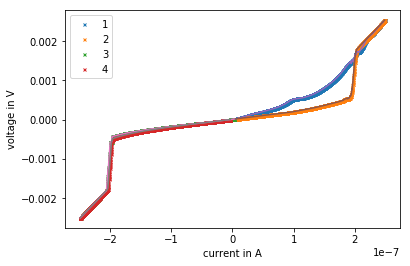

In [99]:
import matplotlib.pyplot as plt

### file name
#data = h5.File('1000nm_v_sweep.h5')
data = h5.File('100nm_I_sweep.h5')

di = np.array(data['/entry/data0/i']) #see what coordinates or value_vectors intrances and create np arrays
dv = np.array(data['/entry/data0/v']) #see what coordinates or value_vectors intrances

di_avg = running_mean(di,30)
dv_avg = running_mean(dv,30)

def sweep_sep_plot(data_i, data_v, sweep):

    dv_up_pos = []
    di_up_pos = []
    dv_down_pos = []
    di_down_pos = []
    dv_up_neg = []
    di_up_neg = []
    dv_down_neg = []
    di_down_neg = []

    if sweep == 'I':
        
        ma = np.argmax(data_i)
        mi = np.argmin(data_i)
        l = len(data_i)
        
    elif sweep == 'V':
        ma = np.argmax(data_v)
        mi = np.argmin(data_v)
        l = len(data_v)

    for i in range (ma+1):
        dv_up_pos.append(data_v[i])
        di_up_pos.append(data_i[i])
    
    for i in range (ma+1,2*ma):
        dv_down_pos.append(data_v[i])
        di_down_pos.append(data_i[i]) 
        
    for i in range (2*ma, mi):
        dv_up_neg.append(data_v[i])
        di_up_neg.append(data_i[i])
    
    for i in range (mi,l):
        dv_down_neg.append(data_v[i])
        di_down_neg.append(data_i[i]) 
    
    ###################Spline#####################################
    
    
    
    #define spline and derivative for further analysis - resistance
    
    sm = 1e-6 #smoothin -> if zero: splin goes through every point
    pot = 3   #polynomial order
    nop = 100000 #number of points
    der = 1     #derivative
    
    
    
    #parameters - turn on and off the splin fuctions:
    
    
    from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline #import functions
    
    if sweep == 'V':
        
        #positive (V_sweep):
        
        #########up########
        
        #spline and range
        spline = UnivariateSpline(dv_up_pos,di_up_pos,s=0,k=3)
        x_range = linspace(dv_up_pos[0],dv_up_pos[-1],100000)
        spline_2d = spline.derivative(n=1)
        
 
        ########down#######
        
        #flip the array - spline needs increaing values: 
        dv_down_pos_flip = np.flip(dv_down_pos,0)
        di_down_pos_flip = np.flip(di_down_pos,0)
        
        
        #spline and range
        spline_2 = UnivariateSpline(dv_down_pos_flip,di_down_pos_flip,s=0,k=3)
        x_range_2 = linspace(dv_down_pos_flip[0],dv_down_pos_flip[-1],100000)
        spline_2_2d = spline_2.derivative(n=1)
               
        
        #negative (V_sweep) :
        
        #########up########
        
        #spline and range
        dv_up_neg_flip = np.flip(dv_up_neg,0)
        di_up_neg_flip = np.flip(di_up_neg,0) # this have to flipped because the control variable has to be increasing
        
        spline_3 = UnivariateSpline(dv_up_neg_flip,di_up_neg_flip,s=0,k=3)
        x_range_3 = linspace(dv_up_neg_flip[0],dv_up_neg_flip[-1],100000)
        spline_3_2d = spline.derivative(n=1)
        
    
        ########down#######
        
        dv_down_neg_flip = np.flip(dv_down_neg,0)
        di_down_neg_flip = np.flip(di_down_neg,0)
        
        #spline and range
        spline_4 = UnivariateSpline(dv_down_neg,di_down_neg,k=1, s=0)
        x_range_4 = linspace(dv_down_neg_flip[0],dv_down_neg_flip[-1],10000)
        #spline_4_2d = spline_4.derivative(n=1)
        #########plot's########
        ### data ###
        figure('data and splines')
        plt.plot(dv_up_pos,di_up_pos, marker = 'x', linestyle = '',markersize = 3, label = '1')
        plt.plot(dv_down_pos,di_down_pos, marker = 'x', linestyle = '',markersize = 3,label = '2')
        plt.plot(dv_up_neg,di_up_neg, marker = 'x', linestyle = '',markersize = 3,label = '3')
        plt.plot(dv_down_neg,di_down_neg, marker = 'x', linestyle = '',markersize = 3,label = '4')
        plt.ylabel('current in A')  
        plt.xlabel('voltage in V')
        plt.legend()
        
        ### splines ###
        plt.plot(x_range, spline(x_range))      #plot up (1)               
        plt.plot(x_range_2,spline_2(x_range_2)) #plot down (2)
        plt.plot(x_range_3,spline_3(x_range_3)) #plot up to negative max (3)
        plt.plot(x_range_4,spline_4(x_range_4)) #plot to zero, no flipping needed in spline (4)
    
    
    
    
    elif sweep == 'I':
                
#########positive (I_sweep):
        
        #########up########
        
        #spline and range
        spline = UnivariateSpline(di_up_pos,dv_up_pos,s=0,k=3)
        x_range = linspace(di_up_pos[0],di_up_pos[-20],10000)
        spline_2d = spline.derivative(n=1)
        
        
        
        ########down#######
        
        #flip the array - spline needs increaing values: 
        dv_down_pos_flip = np.flip(dv_down_pos,0)
        di_down_pos_flip = np.flip(di_down_pos,0)
        
        #spline and range
        spline_2 = UnivariateSpline(di_down_pos_flip,dv_down_pos_flip,k=5,s=0.000)
        x_range_2 = linspace(di_down_pos_flip[0],di_down_pos_flip[-1],1000)
        spline_2_2d = spline_2.derivative(n=1)
        
        

        
        #########up########
        
        #spline and range
        dv_up_neg_flip = np.flip(dv_up_neg,0)
        di_up_neg_flip = np.flip(di_up_neg,0) # this have to flipped because the control variable has to be increasing
        
        spline_3 = UnivariateSpline(di_up_neg_flip,dv_up_neg_flip,s=0,k=3)
        x_range_3 = linspace(di_up_neg_flip[0],di_up_neg_flip[-1],100000)
        spline_3_2d = spline.derivative(n=1)
        
        
        
        
        ########down#######
        
        dv_down_neg_flip = np.flip(dv_down_neg,0)
        di_down_neg_flip = np.flip(di_down_neg,0)
        
        #spline and range
        spline_4 = UnivariateSpline(di_down_neg,dv_down_neg,k=1, s=0)
        x_range_4 = linspace(di_down_neg_flip[0],di_down_neg_flip[-1],10000)
        #spline_4_2d = spline_4.derivative(n=1)
        #########plot's########
         
        
        
        #########plot's########
        
        ### data ###
        figure('data and splines')
        plt.plot(di_up_pos,dv_up_pos, marker = 'x', linestyle = '',markersize = 3, label = '1')
        plt.plot(di_down_pos,dv_down_pos, marker = 'x', linestyle = '',markersize = 3,label = '2')
        plt.plot(di_up_neg,dv_up_neg, marker = 'x', linestyle = '',markersize = 3,label = '3')
        plt.plot(di_down_neg,dv_down_neg, marker = 'x', linestyle = '',markersize = 3,label = '4')
        plt.xlabel('current in A')  
        plt.ylabel('voltage in V')
        plt.legend()
       
        ### splines ###
        plt.plot(x_range,spline(x_range) )      #(1) working
        plt.plot(x_range_2, spline_2(x_range_2)) #(2) working
        plt.plot(x_range_3, spline_3(x_range_3)) #(3) not working
        plt.plot(x_range_4,spline_4(x_range_4)) #(4) working
               
        ####derivatives:#####
        
        #figure('derivative')
        #plot(x_range, spline_2d(x_range)) #(1)
        #plot(x_range_2, spline_2_2d(x_range_2)) #(2)
        #plot(x_range_3, spline_3_2d(x_range_3)) #(2)
        #plot(x_range_4, spline_4_2d(x_range_4)) #(2)
    plt.show()
        
        
        
        
sweep_sep_plot(di_avg, dv_avg, 'I')

In [2]:
#mean_float_function 
#window = 5
def running_mean(data, window):
    data_avg = np.zeros(len(data)-window) #,dtype=np.int
    for i in  range(len(data)):
        if i < len(data)-window:
            data_avg[i] = np.average(data[i:(i+window)])
    return data_avg

#print running_mean(di,5)
#print len(running_mean(di,5))
